In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report, confusion_matrix, fbeta_score, RocCurveDisplay, PrecisionRecallDisplay

In [2]:
c_train = pd.read_csv('Clinical_Data.train.txt', sep='\t')
c_test = pd.read_csv('Clinical_Data.test.txt', sep='\t')
g_train = pd.read_csv('Genotype.train.txt', sep='\t')
g_test = pd.read_csv('Genotype.test.txt', sep='\t')

In [3]:
display(c_train)
display(g_train)

,PatientId,Gender,Height,Weight,Diag,AgeAtDiag,SmokeAtDiag,Leu,Hb,CRP,ESR,Fer,B12,Fol,Alk,Alb
0,1,2,165.0,59.0,CD,16.0,0,5.5,120.0,20,NaN,NaN,NaN,NaN,61.0,NaN
1,3,2,NaN,NaN,UC,31.0,0,7.6,134.0,5,8.0,53,NaN,NaN,43.0,NaN
2,4,1,174.0,67.0,CD,31.0,0,NaN,103.0,40,NaN,226,299,7.9,69.0,35.0
3,5,2,172.0,60.0,UC,56.0,1,13.6,104.0,23,26.0,NaN,NaN,NaN,87.0,32.0
4,6,1,182.0,74.0,CD,22.0,1,5.7,150.0,2,NaN,NaN,NaN,NaN,NaN,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,2026,1,175.0,72.0,CD,25.0,1,6.3,153.0,2.3,NaN,33,258,NaN,52.0,42.0
1986,2027,1,182.0,77.0,CD,26.0,-1,9.9,166.0,NaN,NaN,NaN,NaN,NaN,36.0,NaN
1987,2028,1,170.0,68.0,CD,22.0,0,4.3,115.0,2,10.0,24,161,8.8,45.0,NaN
1988,2029,1,NaN,NaN,CD,16.0,-1,10.3,143.0,15,NaN,49,NaN,NaN,NaN,37.0


,PatientId,SNP_0,SNP_1,SNP_2,SNP_3,SNP_4,SNP_5,SNP_6,SNP_7,SNP_8,...,SNP_368,SNP_369,SNP_370,SNP_371,SNP_372,SNP_373,SNP_374,SNP_375,SNP_376,SNP_377
0,1883,0.0,-1.0,-1,-1.0,0.0,-1.0,-1.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0
1,530,0.0,-1.0,0,0.0,0.0,-1.0,-1.0,0.0,0.0,...,0.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
2,1802,0.0,-1.0,0,0.0,-1.0,0.0,0.0,-1.0,-1.0,...,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0
3,1110,0.0,-1.0,0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,1.0,0.0
4,1971,-1.0,0.0,-1,-1.0,0.0,0.0,-1.0,0.0,-1.0,...,-1.0,0.0,0.0,1.0,-1.0,-1.0,0.0,-1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,276,-1.0,1.0,-1,-1.0,1.0,0.0,-1.0,1.0,0.0,...,-1.0,0.0,0.0,1.0,-1.0,-1.0,0.0,1.0,0.0,0.0
1986,758,-1.0,-1.0,0,-1.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,-1.0
1987,1870,-1.0,0.0,-1,0.0,0.0,-1.0,-1.0,0.0,1.0,...,-1.0,0.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
1988,257,-1.0,-1.0,-1,0.0,0.0,-1.0,-1.0,-1.0,0.0,...,1.0,0.0,-1.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0


In [4]:
c_test = c_test.rename(columns={'ID_new': 'PatientId'})
display(c_test)
display(g_test)


,PatientId,Gender,Height,Weight,AgeAtDiag,SmokeAtDiag,Leu_signe,Leu,Hb_signe,Hb,...,Fer_signe,Fer,B12_signe,B12,Fol_signe,Fol,Alk_signe,Alk,Alb_signe,Alb
0,2,2,163,52,16,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,1,170,77,59,1,NaN,6.90,NaN,169.0,...,NaN,524.0,NaN,128.0,NaN,4.4,NaN,53.0,NaN,NaN
2,13,2,158,49,21,0,NaN,13.50,NaN,130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24,1,180,72,10,0,NaN,9.30,NaN,150.0,...,NaN,43.0,NaN,289.0,NaN,12.6,NaN,68.0,NaN,NaN
4,55,2,164,58,34,1,NaN,4.50,NaN,141.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,62,1,182,80,43,1,NaN,4.10,NaN,126.0,...,NaN,16.0,NaN,171.0,NaN,25.6,NaN,53.0,NaN,NaN
6,95,1,168,54,19,1,NaN,10.90,NaN,127.0,...,NaN,630.0,NaN,9188.0,<,<459.2,NaN,56.0,NaN,28.0
7,104,2,150,44,41,1,NaN,8.50,NaN,113.0,...,NaN,36.0,NaN,135.0,NaN,18.7,NaN,82.0,NaN,30.0
8,153,1,175,95,34,0,NaN,10.70,NaN,141.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,NaN,NaN
9,159,2,159,55,54,1,NaN,15.00,NaN,131.0,...,NaN,258.0,NaN,436.0,NaN,840,NaN,73.0,NaN,41.0


,PatientId,SNP_0,SNP_1,SNP_2,SNP_3,SNP_4,SNP_5,SNP_6,SNP_7,SNP_8,...,SNP_368,SNP_369,SNP_370,SNP_371,SNP_372,SNP_373,SNP_374,SNP_375,SNP_376,SNP_377
0,935,0,0,0,0,-1,-1,1,0,-1,...,0,0,-1,1,-1,-1,1,1,0,-1
1,1493,-1,-1,0,0,1,-1,0,0,-1,...,0,-1,-1,1,-1,-1,0,0,0,0
2,8,0,0,-1,1,-1,-1,1,0,1,...,0,1,0,1,-1,-1,0,1,-1,0
3,62,-1,-1,0,0,-1,-1,0,0,0,...,1,0,-1,1,-1,-1,-1,0,-1,0
4,867,-1,0,-1,0,0,-1,0,1,1,...,-1,0,-1,0,0,0,1,0,0,0
5,1457,-1,0,-1,0,0,0,0,-1,1,...,-1,0,0,1,-1,-1,0,-1,-1,1
6,1740,-1,0,0,-1,0,-1,-1,0,-1,...,0,0,-1,0,-1,-1,0,0,1,-1
7,247,-1,1,-1,0,-1,-1,-1,1,0,...,0,0,0,0,-1,-1,1,-1,0,-1
8,1138,-1,-1,0,1,-1,-1,1,0,0,...,1,-1,0,-1,1,1,0,-1,0,-1
9,1724,-1,0,0,1,0,-1,0,1,-1,...,0,-1,0,0,-1,-1,-1,-1,0,-1


In [5]:
def get_info(df):
    res = pd.DataFrame()
    cols = []
    nunique = []
    unique = []
    datatype = []
    num_of_nan = []
    for column in df:
        cols.append(column)
        nunique.append(df[column].nunique() )
        unique.append( df[column].unique() )
        datatype.append(df[column].dtype)
        num_of_nan.append(df[column].isnull().sum())
        
    
    res['col_name'] = cols
    res['number of unique values'] = nunique
    res['unique values'] = unique
    res['dtype'] = datatype
    res['Number_of_nan'] = num_of_nan

    return display(res.sort_values('Number_of_nan'))

get_info(c_train)
get_info(g_train)

,col_name,number of unique values,unique values,dtype,Number_of_nan
0,PatientId,1990,"[1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, ...",int64,0
1,Gender,2,"[2, 1]",int64,0
4,Diag,2,"[CD, UC]",object,0
6,SmokeAtDiag,3,"[0, 1, -1]",int64,0
5,AgeAtDiag,77,"[16.0, 31.0, 56.0, 22.0, 40.0, 37.0, 53.0, 33....",float64,3
3,Weight,90,"[59.0, nan, 67.0, 60.0, 74.0, 75.0, 69.0, 89.0...",float64,17
2,Height,53,"[165.0, nan, 174.0, 172.0, 182.0, 179.0, 173.0...",float64,20
8,Hb,102,"[120.0, 134.0, 103.0, 104.0, 150.0, 133.0, 140...",float64,84
7,Leu,274,"[5.5, 7.6, nan, 13.6, 5.7, 7.2, 11.1, 8.3, 7.0...",float64,91
9,CRP,234,"[20, 5, 40, 23, 2, <3, 6, 1.1, 7.1, 64, 4, 1.6...",object,188


,col_name,number of unique values,unique values,dtype,Number_of_nan
0,PatientId,1990,"[1883, 530, 1802, 1110, 1971, 739, 836, 249, 1...",int64,0
3,SNP_2,3,"[-1, 0, 1]",int64,0
30,SNP_29,3,"[0, -1, 1]",int64,0
21,SNP_20,3,"[0.0, -1.0, 1.0, nan]",float64,1
342,SNP_341,3,"[-1.0, 0.0, 1.0, nan]",float64,1
...,...,...,...,...,...
279,SNP_278,1,"[nan, -1.0]",float64,1789
207,SNP_206,3,"[nan, -1.0, 1.0, 0.0]",float64,1795
157,SNP_156,2,"[nan, 0.0, -1.0]",float64,1939
198,SNP_197,3,"[nan, 0.0, -1.0, 1.0]",float64,1979


In [6]:
train = pd.merge(c_train, g_train, on='PatientId', how='inner')
test = pd.merge(c_test, g_test, on='PatientId', how='inner')

In [7]:
train.select_dtypes(include=['object']).columns

Index(['Diag', 'CRP', 'Fer', 'B12', 'Fol'], dtype='object')

In [8]:
encoder = LabelEncoder()
encoder.fit_transform(['=', '<', '>'])

def convert(df, col):
    converted = list()
    saturated = list()
    for val in df[col]:
        if isinstance(val, str) and (val.startswith('<') or val.startswith('>')):
            converted.append(float(val[1:]))
            saturated.append(encoder.transform([val[0]])[0])  
        else:
            try:
                converted.append(float(val))
                saturated.append(0)
            except (ValueError, TypeError):
                converted.append(np.nan)
                saturated.append(np.nan)
    df[col] = converted
    df[f'{col}_saturated'] = saturated

In [9]:
encoder.transform(['=', '<', '>'])

array([1, 0, 2])

In [10]:
for i in ['CRP', 'Fer', 'B12', 'Fol']:
    convert(train, i)
    convert(test, i)

In [11]:
get_info(train)

,col_name,number of unique values,unique values,dtype,Number_of_nan
0,PatientId,1990,"[1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, ...",int64,0
395,Fer_saturated,1,[0],int64,0
394,CRP_saturated,1,[0],int64,0
396,B12_saturated,2,"[0, 2]",int64,0
45,SNP_29,3,"[-1, 0, 1]",int64,0
...,...,...,...,...,...
294,SNP_278,1,"[nan, -1.0]",float64,1789
222,SNP_206,3,"[nan, -1.0, 1.0, 0.0]",float64,1795
172,SNP_156,2,"[nan, 0.0, -1.0]",float64,1939
213,SNP_197,3,"[nan, 1.0, -1.0, 0.0]",float64,1979


In [12]:
null_percentage = train.isnull().mean() * 100
columns_to_drop = null_percentage[null_percentage > 50].index
columns_to_drop 

Index(['ESR', 'Fol', 'SNP_31', 'SNP_156', 'SNP_197', 'SNP_206', 'SNP_237',
       'SNP_271', 'SNP_277', 'SNP_278'],
      dtype='object')

In [13]:
train = train.drop(columns_to_drop, axis=1)

In [14]:
label_encoder = LabelEncoder()
train['Diag'] = label_encoder.fit_transform(train['Diag'])

In [15]:
# Diag - Patient's diagnosis (CD - 0, UC - 1)
label_encoder.transform(['CD', 'UC'])

array([0, 1])

In [16]:
sum(train.Diag==1)/len(train.Diag), sum(train.Diag==0)/len(train.Diag)

(0.4020100502512563, 0.5979899497487438)

In [17]:
abs(train.corr().Diag).sort_values()

SNP_211          0.000334
SNP_346          0.000437
SNP_319          0.000463
SNP_78           0.000544
SNP_77           0.000561
                   ...   
SNP_130               NaN
SNP_226               NaN
SNP_315               NaN
CRP_saturated         NaN
Fer_saturated         NaN
Name: Diag, Length: 388, dtype: float64

In [18]:
abs(train.corr().Diag).sort_values()[abs(train.corr().Diag).sort_values()<1]

SNP_211        0.000334
SNP_346        0.000437
SNP_319        0.000463
SNP_78         0.000544
SNP_77         0.000561
                 ...   
SNP_167        0.107355
AgeAtDiag      0.115602
SNP_140        0.118571
SNP_137        0.150129
SmokeAtDiag    0.267620
Name: Diag, Length: 375, dtype: float64

In [19]:
abs(train.corr().Diag).sort_values()[abs(train.corr().Diag).sort_values()<1][-15:]

SNP_72         0.070864
SNP_45         0.078543
SNP_288        0.078543
SNP_303        0.078903
SNP_363        0.079805
Height         0.087601
SNP_233        0.089146
Weight         0.092662
SNP_138        0.095835
SNP_300        0.101058
SNP_167        0.107355
AgeAtDiag      0.115602
SNP_140        0.118571
SNP_137        0.150129
SmokeAtDiag    0.267620
Name: Diag, dtype: float64

In [20]:
cols = abs(train.corr().Diag).sort_values()[abs(train.corr().Diag).sort_values()<1][-35:].keys()
print(cols)
X = train[cols]
y = train['Diag']

Index(['SNP_122', 'SNP_105', 'SNP_311', 'SNP_260', 'SNP_190', 'SNP_97',
       'SNP_287', 'SNP_119', 'SNP_145', 'SNP_241', 'SNP_124', 'SNP_207',
       'SNP_17', 'SNP_150', 'SNP_161', 'SNP_176', 'Gender', 'SNP_213',
       'SNP_181', 'SNP_235', 'SNP_72', 'SNP_45', 'SNP_288', 'SNP_303',
       'SNP_363', 'Height', 'SNP_233', 'Weight', 'SNP_138', 'SNP_300',
       'SNP_167', 'AgeAtDiag', 'SNP_140', 'SNP_137', 'SmokeAtDiag'],
      dtype='object')


In [21]:
X.isna().sum()

SNP_122          6
SNP_105          3
SNP_311          3
SNP_260          7
SNP_190        155
SNP_97          14
SNP_287          3
SNP_119         11
SNP_145          2
SNP_241         13
SNP_124          3
SNP_207         12
SNP_17         373
SNP_150         26
SNP_161         14
SNP_176          2
Gender           0
SNP_213          3
SNP_181         10
SNP_235          3
SNP_72          22
SNP_45           2
SNP_288          2
SNP_303          3
SNP_363          2
Height          20
SNP_233         33
Weight          17
SNP_138          8
SNP_300          8
SNP_167          9
AgeAtDiag        3
SNP_140          3
SNP_137         25
SmokeAtDiag      0
dtype: int64

In [22]:
X = X.fillna(-10)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape, y_train.shape, 

((1592, 35), (1592,))

In [25]:
import statsmodels.formula.api as smf
est = smf.ols(f'Diag ~ {"+ ".join(cols)}', train).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.7056,0.361,-1.953,0.051,-1.414,0.003
SNP_122,-0.0334,0.017,-2.006,0.045,-0.066,-0.001
SNP_105,-0.0459,0.019,-2.383,0.017,-0.084,-0.008
SNP_311,0.0558,0.023,2.409,0.016,0.010,0.101
SNP_260,-0.0430,0.037,-1.179,0.239,-0.115,0.029
SNP_190,-0.0385,0.017,-2.299,0.022,-0.071,-0.006
SNP_97,-0.0608,0.021,-2.905,0.004,-0.102,-0.020
SNP_287,-0.0237,0.017,-1.410,0.159,-0.057,0.009
SNP_119,-0.0457,0.017,-2.735,0.006,-0.079,-0.013
SNP_145,-0.0124,0.021,-0.601,0.548,-0.053,0.028


## Logistic Regression

In [26]:
lr = LogisticRegression(max_iter=1000,class_weight='balanced' )
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_scores = lr.predict_proba(X_test)[:, 1]


F1_score: [0.732 0.655]
Accuracy: 0.698

--------------------------------------------------------------------------------------

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       229
           1       0.64      0.67      0.66       169

    accuracy                           0.70       398
   macro avg       0.69      0.70      0.69       398
weighted avg       0.70      0.70      0.70       398


--------------------------------------------------------------------------------------

Confusion matrix:
              Predicted NO   Predicted YES
 Actual NO             164              65
 Actual YES             55             114

--------------------------------------------------------------------------------------



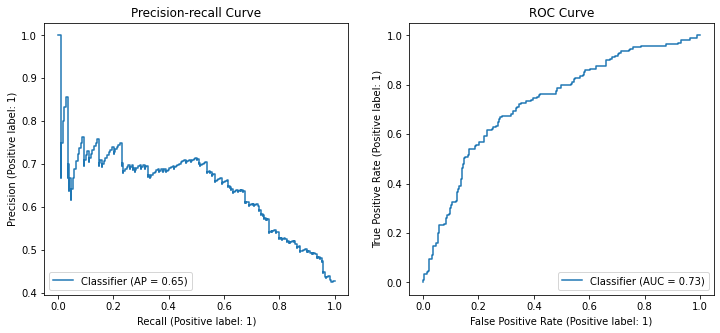

In [27]:
def print_evaluate(true, predicted, scores):  
#     recall = recall_score(true, predicted,average=None)
#     presion = precision_score(true, predicted,average=None)
    f1= f1_score(true, predicted,average=None)
    accuracy = accuracy_score(true, predicted)

#     print('Recall', np.round(recall,3))
#     print('Presion:', np.round(presion,3))
    print('F1_score:', np.round(f1,3))
    print('Accuracy:', np.round(accuracy,3))
    
    print('\n--------------------------------------------------------------------------------------\n')
    print('Classification report:')
    print(classification_report(true, predicted))

    print('\n--------------------------------------------------------------------------------------\n')
    print('Confusion matrix:')
    conf_m = pd.DataFrame(confusion_matrix(true,  predicted), 
                               columns=[" Predicted NO", " Predicted YES"],
                               index=[" Actual NO", " Actual YES"])
    print(conf_m)
    
    print('\n--------------------------------------------------------------------------------------\n')
    fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
    PrecisionRecallDisplay.from_predictions(true, scores, ax=ax[0])
    ax[0].set(title = 'Precision-recall Curve');
    RocCurveDisplay.from_predictions(true, scores, ax=ax[1])
    ax[1].set(title = 'ROC Curve');
    
print_evaluate(y_test, y_pred, y_scores)

In [28]:
from imblearn.under_sampling import TomekLinks

# Assuming you have X_train and y_train as your training data

# Create TomekLinks object
tl = TomekLinks()

# Perform undersampling
X_train_resampled, y_train_resampled = tl.fit_resample(X_train, y_train)

In [237]:
# from imblearn.under_sampling import RandomUnderSampler

# # Create an instance of RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)

# # Apply undersampling to the training data
# X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)



## zhai

In [29]:
from keras import backend as K

In [30]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [31]:
import random
from tensorflow.keras.optimizers import Adam
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [32]:
model = tf.keras.Sequential()

model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

adam = Adam(learning_rate=1e-3)

# Compile the model
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=[f1_m])

# Train the model
model.fit(X_train_resampled, y_train_resampled , epochs=10, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/10


2023-06-18 22:11:43.539733: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


177/177 [==============================] - 1s 3ms/step - loss: 0.7424 - f1_m: 0.2660 - val_loss: 0.6722 - val_f1_m: 0.3478
Epoch 2/10
177/177 [==============================] - 0s 2ms/step - loss: 0.6916 - f1_m: 0.3377 - val_loss: 0.7055 - val_f1_m: 0.5941
Epoch 3/10
177/177 [==============================] - 0s 2ms/step - loss: 0.6754 - f1_m: 0.3792 - val_loss: 0.6718 - val_f1_m: 0.0147
Epoch 4/10
177/177 [==============================] - 0s 2ms/step - loss: 0.6786 - f1_m: 0.3463 - val_loss: 0.6557 - val_f1_m: 0.4365
Epoch 5/10
177/177 [==============================] - 0s 2ms/step - loss: 0.6614 - f1_m: 0.4445 - val_loss: 0.6864 - val_f1_m: 0.6030
Epoch 6/10
177/177 [==============================] - 0s 2ms/step - loss: 0.6582 - f1_m: 0.4733 - val_loss: 0.6510 - val_f1_m: 0.4428
Epoch 7/10
177/177 [==============================] - 0s 2ms/step - loss: 0.6619 - f1_m: 0.4501 - val_loss: 0.6477 - val_f1_m: 0.5003
Epoch 8/10
177/177 [==============================] - 0s 2ms/step - loss:

F1_score: [0.593 0.662]
Accuracy: 0.631

--------------------------------------------------------------------------------------

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.47      0.59       229
           1       0.54      0.85      0.66       169

    accuracy                           0.63       398
   macro avg       0.68      0.66      0.63       398
weighted avg       0.70      0.63      0.62       398


--------------------------------------------------------------------------------------

Confusion matrix:
              Predicted NO   Predicted YES
 Actual NO             107             122
 Actual YES             25             144

--------------------------------------------------------------------------------------



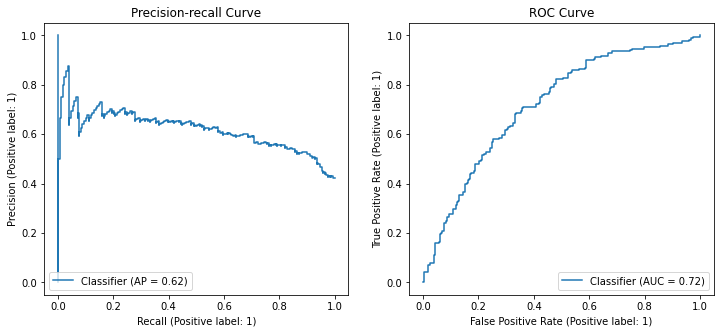

In [33]:
y_pred_prob = model.predict(X_test).flatten()
print_evaluate(y_test, np.round(y_pred_prob).astype(int), y_pred_prob)

## Submission 

In [321]:
x = test[cols]
x.isna().sum()

SNP_122        0
SNP_105        0
SNP_311        0
SNP_260        0
SNP_190        3
SNP_97         0
SNP_287        0
SNP_119        0
SNP_145        0
SNP_241        0
SNP_124        0
SNP_207        0
SNP_17         8
SNP_150        0
SNP_161        0
SNP_176        0
Gender         0
SNP_213        0
SNP_181        0
SNP_235        0
SNP_72         0
SNP_45         0
SNP_288        0
SNP_303        0
SNP_363        0
Height         0
SNP_233        0
Weight         0
SNP_138        0
SNP_300        0
SNP_167        0
AgeAtDiag      0
SNP_140        0
SNP_137        0
SmokeAtDiag    0
dtype: int64

In [322]:
x= x.fillna(-10)

In [323]:
# pred = lr.predict(x)

In [324]:
pred = np.round(model.predict(x)).astype(int).flatten()
pred

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0])

In [325]:
sample = pd.DataFrame({ 'PatientId': test.PatientId, 'Diag': pred})
# sample.set_index('PatientId', inplace=True)
sample

,PatientId,Diag
0,2,0
1,8,1
2,13,1
3,24,1
4,55,0
5,62,1
6,95,0
7,104,0
8,153,1
9,159,0


In [326]:
sample.to_csv("sample.csv", index=None)